In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
import os, fnmatch
from cobaya import load_samples
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline 

def loadgridchains(path, excludec=[]):
    Samples={}
    for root, dirs, files in os.walk(path):
        for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
            if chain_name in excludec: continue
            subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
            only_subdir = subdirs[0]
            subdir_path = os.path.join(root, chain_name, only_subdir)
            Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
            Samples[chain_name].label = chain_name
            Samples[chain_name].ma_val = -int(chain_name[-2:])
            p=Samples[chain_name].getParams()
            Samples[chain_name].addDerived(p.omega_scf/(p.omega_cdm+p.omega_b+p.omega_scf), name='fx', label=r'f_\chi', range=[0.,None])
    return list(Samples.values())

In [2]:
grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_Q0'

chains_to_plot_boss=loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_Q0')

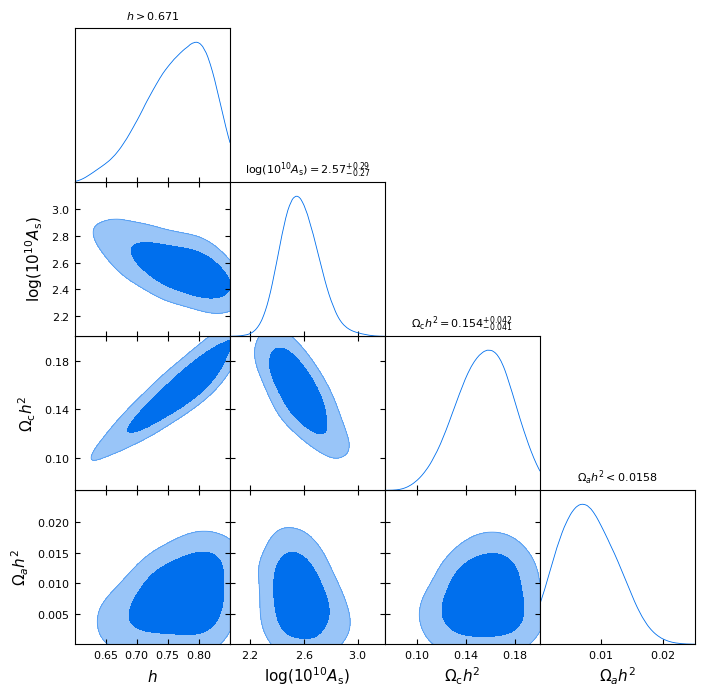

In [7]:

pars_toplot =['h','logA','omega_cdm','omega_scf']

gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot(chains_to_plot_boss[2] ,  pars_toplot, title_limit=2, filled=True)
# gdplot.finish_plot(no_tight=True)

In [16]:
for samp in chains_to_plot_boss:
    print(samp.label[5:],'-->', samp.getInlineLatex('omega_scf',limit=2))


m24 --> \Omega_{a} h^2 < 0.139
m25 --> \Omega_{a} h^2 < 0.0240
m26 --> \Omega_{a} h^2 < 0.0158
m27 --> \Omega_{a} h^2 < 0.00435
m28 --> \Omega_{a} h^2 < 0.00815


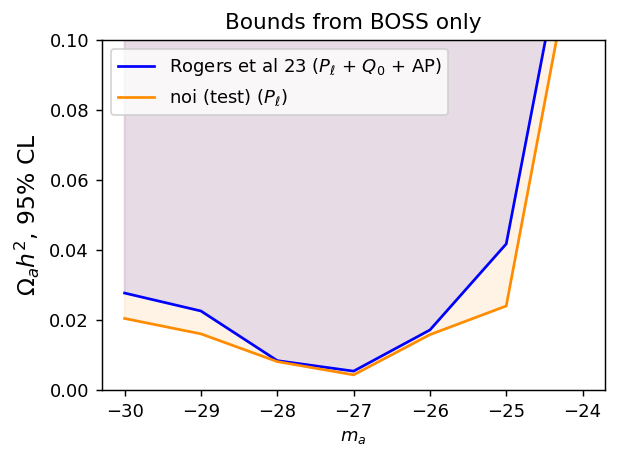

In [3]:
plt.figure(figsize=(5,3.5), dpi=130)
mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersBOSS = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]
plt.plot(mvals, RogersBOSS,'b', label=r'Rogers et al 23 ($P_\ell$ + $Q_0$ + AP)')
plt.fill_between(mvals, RogersBOSS, y2=0.16, interpolate=True, color='b', alpha=0.1)

# My bounds
my2lims = [samp.getMargeStats().parWithName('omega_scf').limits[1].upper for samp in chains_to_plot_boss]
mvals2 = [samp.ma_val for samp in chains_to_plot_boss] 

# my2lims_Pell = my2lims
plt.plot(mvals2, my2lims, 'darkorange',label='noi (test) ($P_\ell$)')
plt.fill_between(mvals2, my2lims, y2=0.16, interpolate=True, color='darkorange', alpha=0.1)

# plt.plot(mvals, my2lims_Pell, 'r',label='noi (test) ($P_\ell$)')

plt.ylim([0.,0.1])
# plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.title('Bounds from BOSS only')
plt.show()

In [56]:
from tabulate import tabulate
table = tabulate(list(zip(mvals,RogersPlanck, my2lims+[None,None,None])), headers=[r'$m_a$',r'Rogers Planck $\Omega_a h^2$ 95%CL',r'noi Planck'], floatfmt='.3g',tablefmt="latex_raw", rowalign='center')
print(table)

\begin{tabular}{rrr}
\hline
   $m_a$ &   Rogers Planck $\Omega_a h^2$ 95%CL &   noi Planck \\
\hline
     -24 &                              0.114   &      0.107   \\
     -25 &                              0.0967  &      0.0719  \\
     -26 &                              0.00615 &      0.00613 \\
     -27 &                              0.00344 &      0.00304 \\
     -28 &                              0.00163 &              \\
     -29 &                              0.00136 &              \\
     -30 &                              0.00145 &              \\
\hline
\end{tabular}


-----
Compare with and without Q0

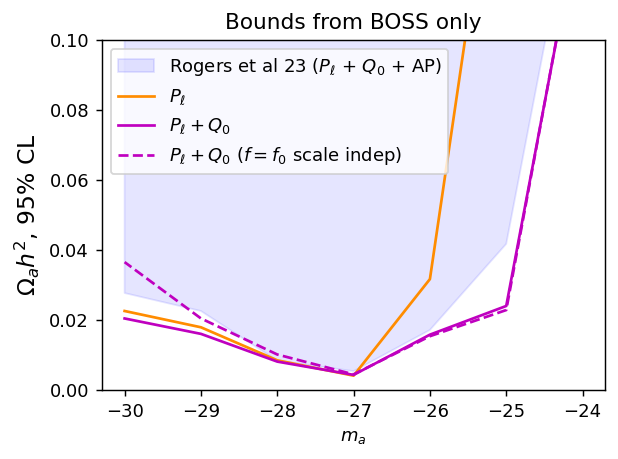

In [8]:


plt.figure(figsize=(5,3.5), dpi=130)
# plt.plot(mvals, RogersBOSS,'b', label=r'Rogers et al 23 ($P_\ell$ + $Q_0$ + AP)')
plt.fill_between(mvals, RogersBOSS, y2=0.16, interpolate=True, color='b', alpha=0.1, label=r'Rogers et al 23 ($P_\ell$ + $Q_0$ + AP)')

grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigridb2bG2_deltamincl'
wQ0vals=[]
for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        # if chain_name in ['base_m29','base_m30']: continue
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        samp = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        wQ0vals.append([-int(chain_name[-2:]),samp.getMargeStats().parWithName('omega_scf').limits[1].upper])

wQ0vals=np.array(wQ0vals)
mv, lims = wQ0vals.T
plt.plot(mv, lims,'darkorange', label=r'$P_\ell$')

grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_Q0'
wQ0vals=[]
for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        # if chain_name in ['base_m29','base_m30']: continue
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        samp = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        wQ0vals.append([-int(chain_name[-2:]),samp.getMargeStats().parWithName('omega_scf').limits[1].upper])

wQ0vals=np.array(wQ0vals)
mv, lims = wQ0vals.T
plt.plot(mv, lims,'m', label=r'$P_\ell+Q_0$')


grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_Q0_fscaleindep'
wQ0vals=[]
for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        # if chain_name in ['base_m29','base_m30']: continue
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        samp = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        wQ0vals.append([-int(chain_name[-2:]),samp.getMargeStats().parWithName('omega_scf').limits[1].upper])
wQ0vals=np.array(wQ0vals)
mv, lims = wQ0vals.T
plt.plot(mv, lims,'m--', label=r'$P_\ell+Q_0$ ($f=f_0$ scale indep)')


plt.ylim([0,0.1])
# plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.title('Bounds from BOSS only')
plt.show()

---
Compare with Rogers CMB

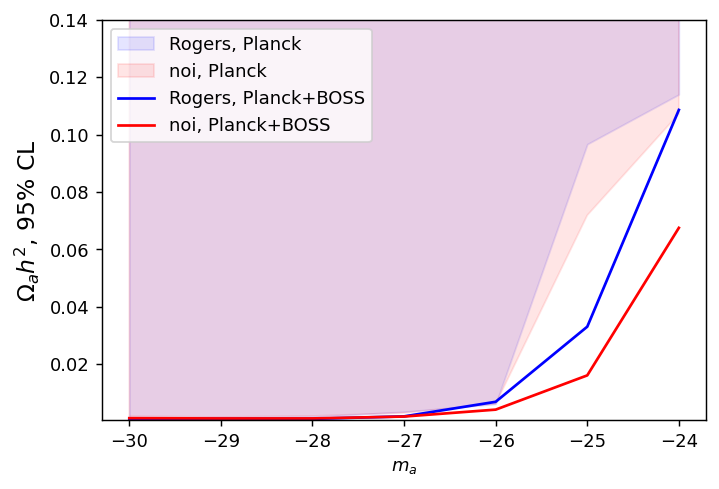

In [7]:
plt.figure(figsize=(6,4), dpi=130)
mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersPlanck = [0.11399,0.09667,0.00615,0.00344,0.00163,0.00136,0.00145]
RogersPlanckBOSS = [0.10858,0.03306,0.00689,0.00181,0.00095,0.00097,0.00099]

plt.fill_between(mvals, RogersPlanck, y2=0.16, interpolate=True, color='b', alpha=0.1, label='Rogers, Planck')

# -----------
mycmbvals = np.array([[samp.ma_val,samp.getMargeStats().parWithName('omega_scf').limits[1].upper] for samp in loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_cmb_only')])
mv, lims = mycmbvals.T
plt.fill_between(mv, lims, y2=0.2, interpolate=True, color='r', alpha=0.1, label='noi, Planck')

plt.plot(mvals, RogersPlanckBOSS, color='b', label='Rogers, Planck+BOSS')

# -----------
mycmbBOSSvals = np.array([[samp.ma_val,samp.getMargeStats().parWithName('omega_scf').limits[1].upper] for samp in loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_cmblss_nobr')])
mv, lims = mycmbBOSSvals.T
plt.plot(mv, lims, color='r', label='noi, Planck+BOSS')

# -----------
mycmbBOSSvalsbr = np.array([[samp.ma_val,samp.getMargeStats().parWithName('omega_scf').limits[1].upper] for samp in loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_cmblss_withbr')])
mv, lims = mycmbBOSSvalsbr.T
# plt.plot(mv, lims,'r--', linewidth=0.8, label=r'noi, Planck+BOSS (vary $b_r$)')


plt.ylim([5.e-4,0.14])
# plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.show()

---
view as $k_J$ vs $f_\chi$

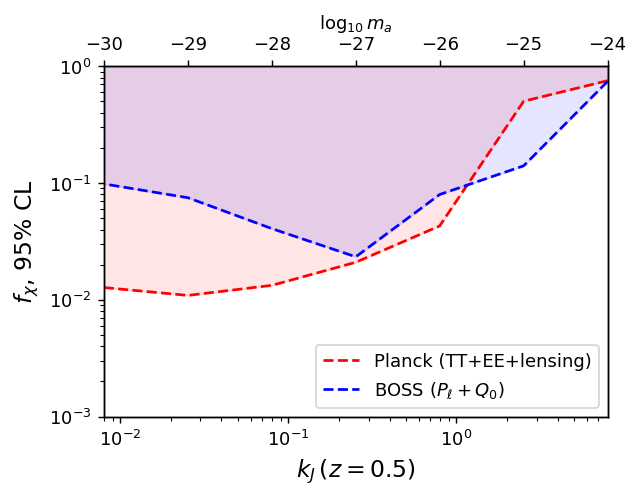

In [7]:
chains_to_plot_cmb = loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_cmb_only')
mymavals = np.array([samp.ma_val for samp in chains_to_plot_cmb])
myhvals = np.array([samp.getMargeStats().parWithName('h').mean for samp in chains_to_plot_cmb])
mykJvals= np.sqrt(3.336e-04 * myhvals * pow(10.,(mymavals)) * 1.56e29)/myhvals * (0.6666)**0.25
myfxlim_cmb = [samp.getMargeStats().parWithName('fx').limits[1].upper for samp in chains_to_plot_cmb]
myfxlim_boss = [samp.getMargeStats().parWithName('fx').limits[1].upper for samp in chains_to_plot_boss]

fig, ax1 = plt.subplots(figsize=(5,3.5), dpi=130)

ax1.plot(mykJvals, myfxlim_cmb, 'r--',label='Planck (TT+EE+lensing)')
ax1.fill_between(mykJvals, myfxlim_cmb, y2=1, interpolate=True, color='r', alpha=0.1)

ax1.plot(mykJvals, myfxlim_boss, 'b--',label='BOSS ($P_\ell+Q_0$)')
ax1.fill_between(mykJvals, myfxlim_boss, y2=1, interpolate=True, color='b', alpha=0.1)



ax1.set_xlim([mykJvals[-1],mykJvals[0]])
ax1.set_ylim([1.e-3,1.])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$k_J\,(z=0.5)$', fontsize=13)
ax1.set_ylabel(r'$f_\chi$, 95% CL', fontsize=13)
ax1.legend(loc='lower right')

# Creating a secondary x-axis
ax2 = ax1.twiny()
ax2.set_xlim([mymavals[-1],mymavals[0]])
plt.scatter(mymavals, myfxlim_cmb, alpha=0.)  # giusto per plottare qualcosa

ax2.set_xlabel(r'$\log_{10}m_a$')

plt.show()

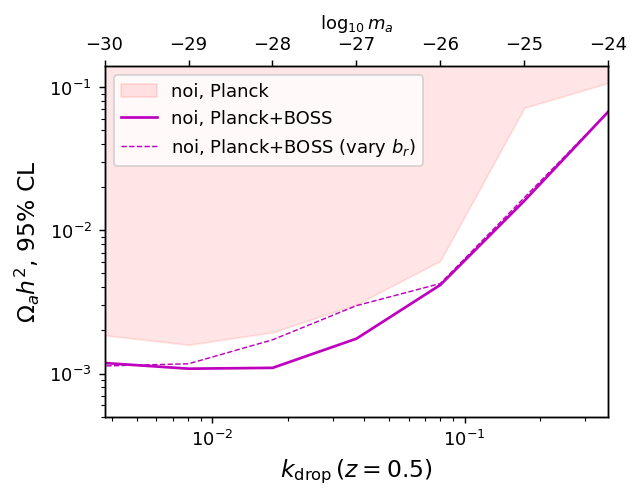

In [27]:
chains_to_plot_cmb = loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_cmb_only')
mymavals = np.array([samp.ma_val for samp in chains_to_plot_cmb])
myhvals = np.array([samp.getMargeStats().parWithName('h').mean for samp in chains_to_plot_cmb])

# Proper kJ
mykJvals= np.sqrt(3.336e-04 * myhvals * pow(10.,(mymavals)) * 1.56e29)/myhvals * (0.6666)**0.25

# Ennio's kDrop
mykJvals= 4.2e-4 * pow(pow(10.,mymavals)*1.56e29/3.336e-04/myhvals,1/3)

fig, ax1 = plt.subplots(figsize=(5,3.5), dpi=130)

mv, lims = mycmbvals.T
plt.fill_between(mykJvals, lims, y2=0.2, interpolate=True, color='r', alpha=0.1, label='noi, Planck')


# -----------
mv, lims = mycmbBOSSvals.T
plt.plot(mykJvals, lims, color='m', label='noi, Planck+BOSS')

# -----------
mv, lims = mycmbBOSSvalsbr.T
mykJvalsbr = np.hstack((mykJvals[0],mykJvals[2:])) 
plt.plot(mykJvalsbr, lims,'m--', linewidth=0.8, label=r'noi, Planck+BOSS (vary $b_r$)')



ax1.set_xlim([mykJvals[-1],mykJvals[0]])
ax1.set_ylim([5.e-4,0.14])
ax1.set_ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$k_J\,(z=0.5)$', fontsize=13)
ax1.set_xlabel(r'$k_\mathrm{drop}\,(z=0.5)$', fontsize=13)

ax1.legend(loc='upper left')

# Creating a secondary x-axis
ax2 = ax1.twiny()
ax2.set_xlim([mymavals[-1],mymavals[0]])
plt.scatter(mymavals, myfxlim_cmb, alpha=0.)  # giusto per plottare qualcosa

ax2.set_xlabel(r'$\log_{10}m_a$')
# plt.savefig('/home/fverdian/cobaya/FRA/cornerplots/exclusion_plots/xkdrop.pdf', bbox_inches='tight')
plt.show()

In [51]:
print(mykJvals)
print(mymavals)

[7.93713331 2.51335742 0.79519881 0.25198108 0.07991536 0.02526936
 0.00798984]
[-24 -25 -26 -27 -28 -29 -30]
